Here we are going to use 4 machine learning techniques for classification.
- Decision Tree
- Random Forest
- Support vector machine(SVM)
- Naive Bayes
- Logistic Regression



In [2]:
import pandas as pd
import matplotlib.pyplot as plt

#Loading the data
dataset = pd.read_csv('dataset1.csv')
dataset.head()

,Links_in_tags,Abnormal_URL,Submitting_to_email,SFH,Iframe,popUpWidnow,on_mouseover,RightClick,Redirect,Result
0,0,-1,1,1,-1,1,1,1,-1,1
1,1,-1,1,1,-1,1,1,1,-1,1
2,1,-1,1,1,-1,1,1,1,0,1
3,-1,-1,1,-1,1,-1,-1,-1,-1,-1
4,0,-1,1,-1,1,-1,-1,-1,-1,-1


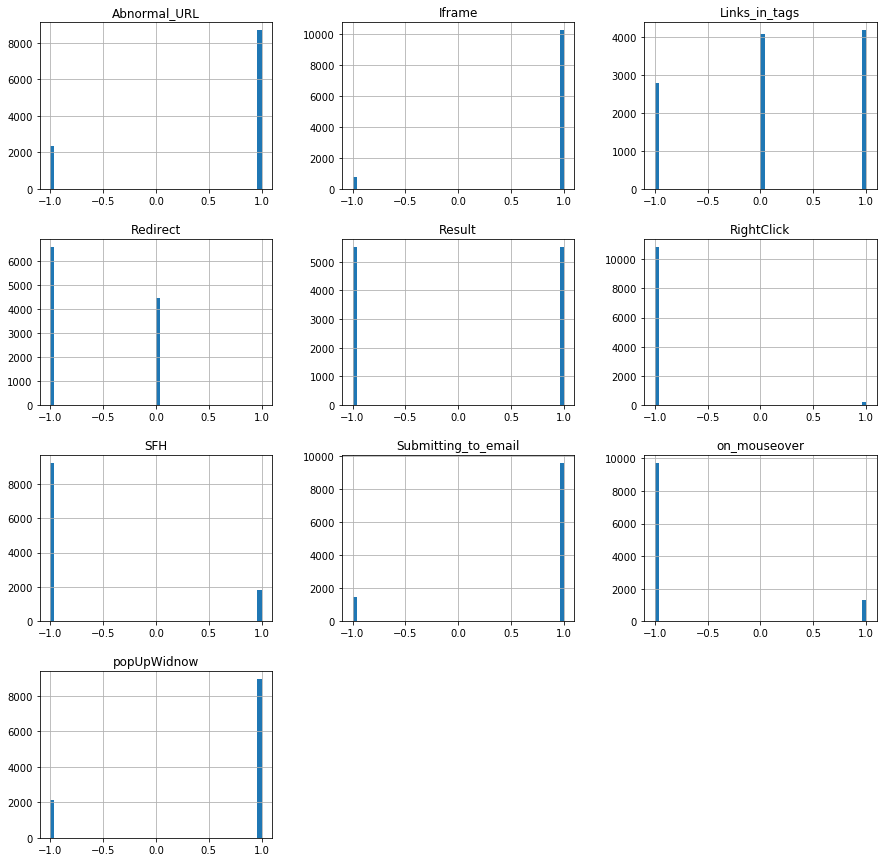

In [3]:
#For visualization - Plotting the data distribution
dataset.hist(bins = 50,figsize = (15,15))
plt.show()

In [105]:
# Splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X= dataset.drop(columns='Result')
Y = dataset['Result']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X) # this is for the cross validation

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape


((8843, 9), (2211, 9))

In [90]:
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
import numpy as np
from matplotlib.pyplot import figure
from statistics import mean

### 1 - Lets carry out classification for all the features

##### 1.1 - Decision Tree Classifier

In [45]:
from sklearn.tree import DecisionTreeClassifier

d_tree=DecisionTreeClassifier()
model_1=d_tree.fit(X_train,Y_train)

dtree_predict=model_1.predict(X_test)
accuracy_score(dtree_predict,Y_test)

0.8543645409317051

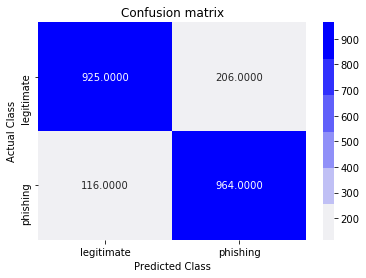

In [46]:
# Confusion matrix
plt.title('Decision Tree Classifier\'s Confusion Matrix')
data = confusion_matrix(Y_test,dtree_predict) #y_test - actual data ##dtree_predict - predicted y
labels = ['legitimate','phishing']
cmap=sns.light_palette("blue")
sns.heatmap(data, annot=True, cmap=cmap, fmt=".4f", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title("Confusion matrix")
plt.show()

In [101]:
# k fold cross validation for Decision tree
kf = StratifiedKFold(n_splits=5, random_state=np.random.seed(1))

train_accuracy = []
test_accuracy = []

for train_index, test_index in kf.split(X, Y):  
    X_train_new, X_test_new = X_scaled[train_index], X_scaled[test_index]    
    y_train_new, y_test_new = Y[train_index], Y[test_index]
    
    model_1.fit(X_train_new, y_train_new)

    #train accuracy
    conf_matrix = confusion_matrix(y_train_new, model_1.predict(X_train_new))
    tn, fp, fn, tp = conf_matrix.ravel()
    train_accuracy.append( (tp + tn) / (tp+tn+fp+fn) )

    #test accuracy
    conf_matrix = confusion_matrix(y_test_new, model_1.predict(X_test_new))
    tn, fp, fn, tp = conf_matrix.ravel()
    test_accuracy.append( (tp + tn) / (tp+tn+fp+fn) )

print('mean test accuracy : '+str(mean(test_accuracy)))
print('max test accuracy : '+str(max(test_accuracy)))

    
for a in range(5):
    print(str(a+1)+' -- Train accuracy: '+str(train_accuracy[a])+' -- Test accuracy: '+str(test_accuracy[a]))


mean test accuracy : 0.7707658335226377
max test accuracy : 0.9045680687471732
1 -- Train accuracy: 0.832409815673414 -- Test accuracy: 0.9045680687471732
2 -- Train accuracy: 0.8654302838403257 -- Test accuracy: 0.772501130710086
3 -- Train accuracy: 0.8766255795544499 -- Test accuracy: 0.5653550429669832
4 -- Train accuracy: 0.8322967318783219 -- Test accuracy: 0.7951153324287653
5 -- Train accuracy: 0.8544776119402985 -- Test accuracy: 0.816289592760181


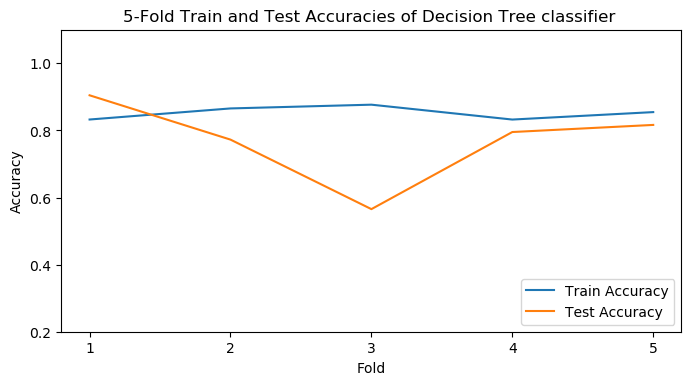

In [138]:
plt.rcParams["font.size"] = "10"
fig = figure(num=None, figsize=(8, 4), dpi=100, facecolor='w',edgecolor='k')
plt.ylim(0.2, 1.1)
plt.xticks(range(5), ['1', '2', '3', '4', '5'])

plt.plot(train_accuracy)
plt.plot(test_accuracy)

plt.title('5-Fold Train and Test Accuracies of Decision Tree classifier ')
plt.ylabel('Accuracy')
plt.xlabel('Fold')
plt.legend(['Train Accuracy', 'Test Accuracy'], loc='lower right')
plt.show()

c:\users\lakru\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_roc_curve instead.
  warnings.warn(msg, category=FutureWarning)


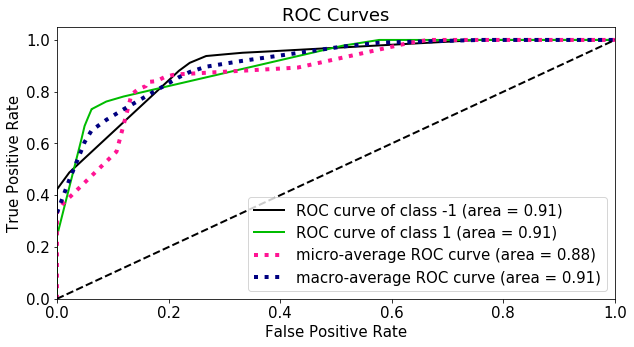

In [141]:
# ROC curve
import scikitplot.plotters as skplt

plt.rcParams["font.size"] = "15"
plt.rcParams["figure.figsize"] = (10,5)

skplt.plot_roc_curve(Y_test, model_1.predict_proba(X_test))
plt.show()

c:\users\lakru\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_precision_recall_curve instead.
  warnings.warn(msg, category=FutureWarning)


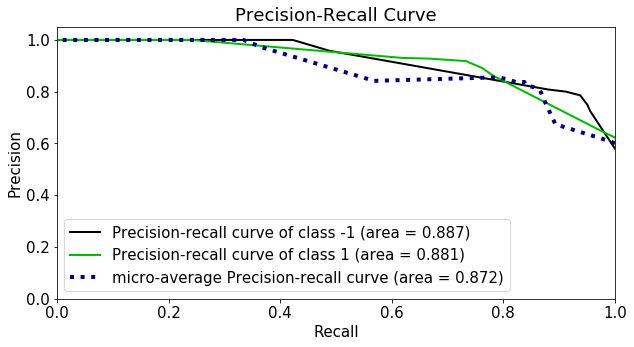

In [142]:
# precision recall curve
skplt.plot_precision_recall_curve(Y_test, model_1.predict_proba(X_test))
plt.show()

##### 1.2 - Random Forest Classifier

In [45]:
from sklearn.tree import DecisionTreeClassifier

d_tree=DecisionTreeClassifier()
model_1=d_tree.fit(X_train,Y_train)

dtree_predict=model_1.predict(X_test)
accuracy_score(dtree_predict,Y_test)

0.8543645409317051

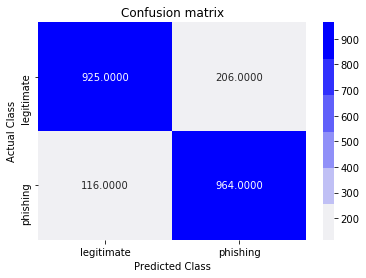

In [46]:
plt.title('Decision Tree Classifier\'s Confusion Matrix')
data = confusion_matrix(Y_test,dtree_predict) #y_test - actual data ##dtree_predict - predicted y
labels = ['legitimate','phishing']
cmap=sns.light_palette("blue")
sns.heatmap(data, annot=True, cmap=cmap, fmt=".4f", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title("Confusion matrix")
plt.show()

In [101]:
# k fold cross validation for Decision tree
kf = StratifiedKFold(n_splits=5, random_state=np.random.seed(1))

train_accuracy = []
test_accuracy = []

for train_index, test_index in kf.split(X, Y):  
    X_train_new, X_test_new = X_scaled[train_index], X_scaled[test_index]    
    y_train_new, y_test_new = Y[train_index], Y[test_index]
    
    model_1.fit(X_train_new, y_train_new)

    #train accuracy
    conf_matrix = confusion_matrix(y_train_new, model_1.predict(X_train_new))
    tn, fp, fn, tp = conf_matrix.ravel()
    train_accuracy.append( (tp + tn) / (tp+tn+fp+fn) )

    #test accuracy
    conf_matrix = confusion_matrix(y_test_new, model_1.predict(X_test_new))
    tn, fp, fn, tp = conf_matrix.ravel()
    test_accuracy.append( (tp + tn) / (tp+tn+fp+fn) )

print('mean test accuracy : '+str(mean(test_accuracy)))
print('max test accuracy : '+str(max(test_accuracy)))

    
for a in range(5):
    print(str(a+1)+' -- Train accuracy: '+str(train_accuracy[a])+' -- Test accuracy: '+str(test_accuracy[a]))


mean test accuracy : 0.7707658335226377
max test accuracy : 0.9045680687471732
1 -- Train accuracy: 0.832409815673414 -- Test accuracy: 0.9045680687471732
2 -- Train accuracy: 0.8654302838403257 -- Test accuracy: 0.772501130710086
3 -- Train accuracy: 0.8766255795544499 -- Test accuracy: 0.5653550429669832
4 -- Train accuracy: 0.8322967318783219 -- Test accuracy: 0.7951153324287653
5 -- Train accuracy: 0.8544776119402985 -- Test accuracy: 0.816289592760181


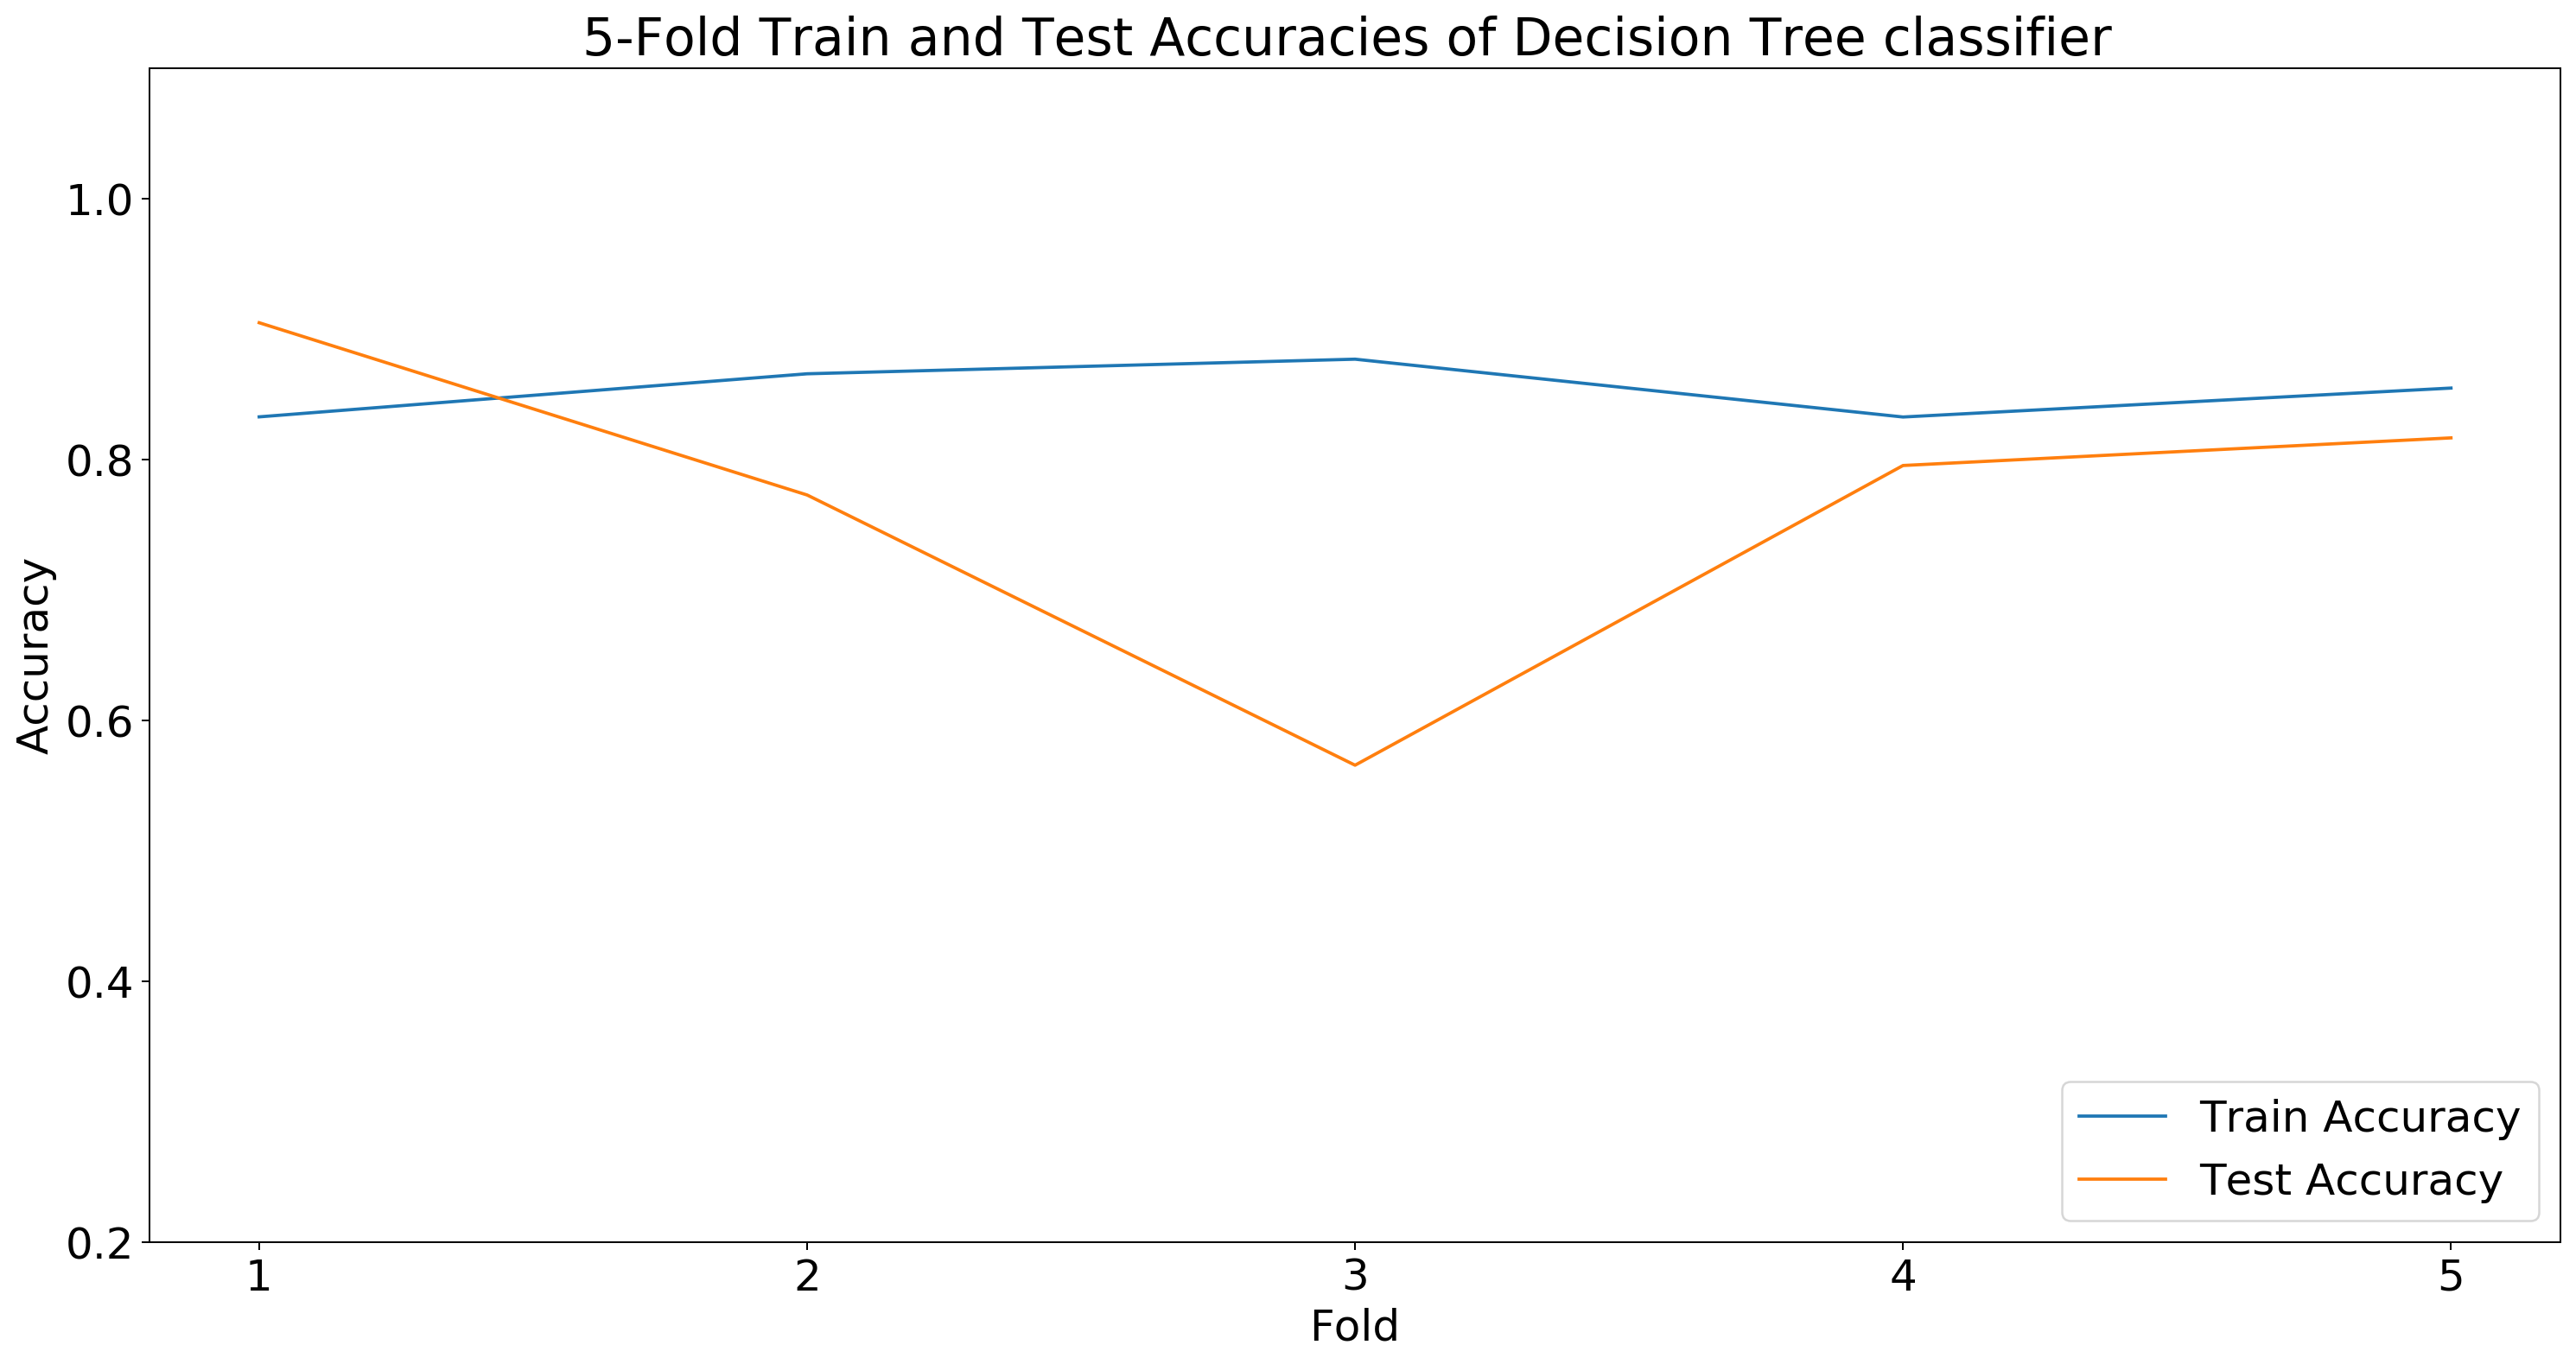

In [102]:
plt.rcParams["font.size"] = "10"
fig = figure(num=None, figsize=(8, 4), dpi=100, facecolor='w',edgecolor='k')
plt.ylim(0.2, 1.1)
plt.xticks(range(5), ['1', '2', '3', '4', '5'])

plt.plot(train_accuracy)
plt.plot(test_accuracy)

plt.title('5-Fold Train and Test Accuracies of Decision Tree classifier ')
plt.ylabel('Accuracy')
plt.xlabel('Fold')
plt.legend(['Train Accuracy', 'Test Accuracy'], loc='lower right')
plt.show()

c:\users\lakru\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_roc_curve instead.
  warnings.warn(msg, category=FutureWarning)


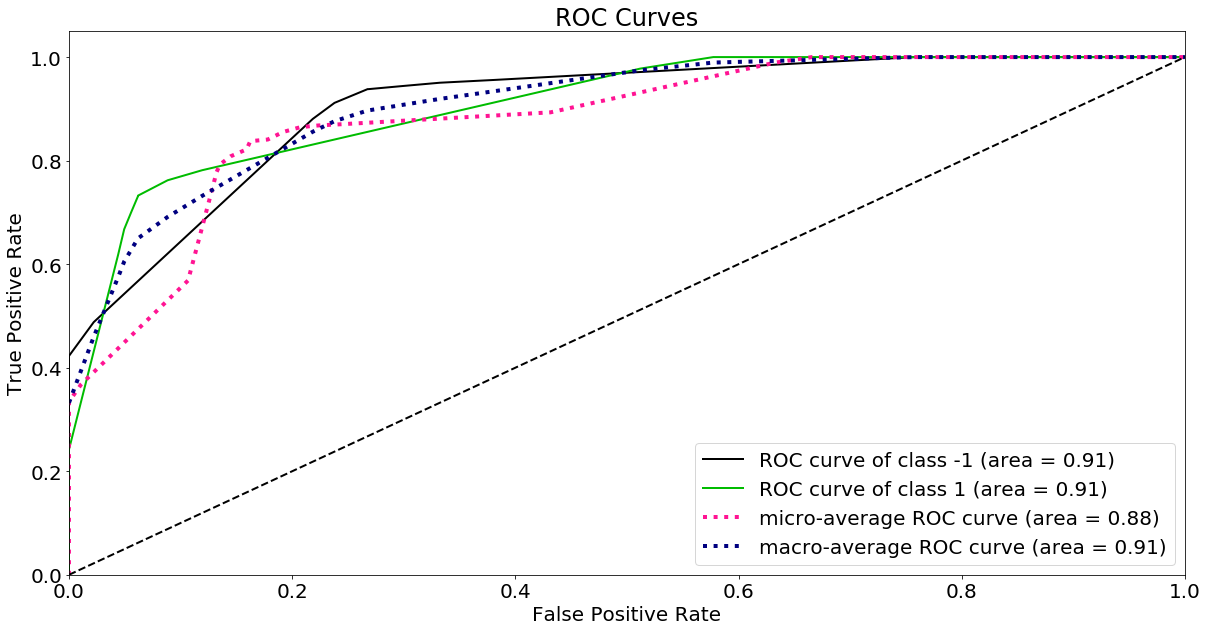

In [131]:
# ROC curve
import scikitplot.plotters as skplt

plt.rcParams["font.size"] = "15"
plt.rcParams["figure.figsize"] = (10,5)

skplt.plot_roc_curve(Y_test, model_1.predict_proba(X_test))
plt.show()

c:\users\lakru\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_precision_recall_curve instead.
  warnings.warn(msg, category=FutureWarning)


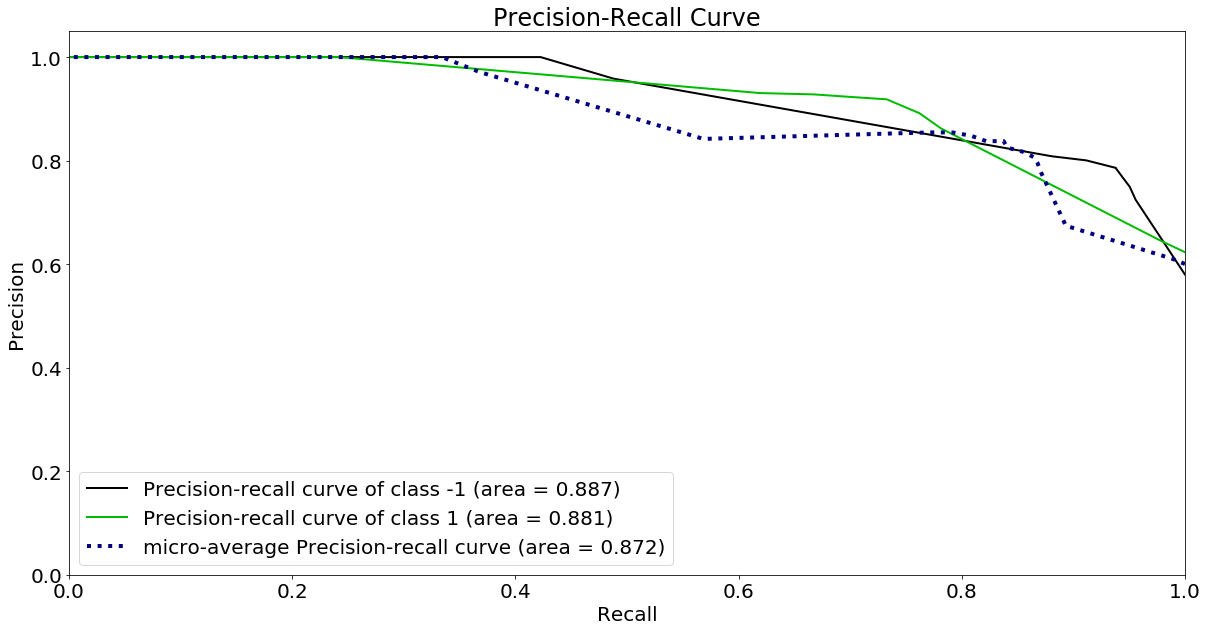

In [129]:
# precision recall curve
skplt.plot_precision_recall_curve(Y_test, model_1.predict_proba(X_test))
plt.show()